<a href="https://colab.research.google.com/github/championcode2025/machine_learning/blob/main/projects/bank_marketing_campaign/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pre Processing the data

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer


In [20]:
# loading the dataset
df = pd.read_csv('bank.csv')
for i in df.columns:
  if df[i].value_counts().get("unknown",0) > 0:# checking if the df contains unknown intsead of nan
    print(i)

df.replace("unknown",np.nan,inplace=True) #replacing unknown with nan
# filling the missing value with statistical methods
df["age"] = df["age"].fillna(df["age"].mean(),inplace=True)
df["housing"] = df["housing"].fillna(df["housing"].mode()[0],inplace=True)
df["loan"] = df["loan"].fillna(df["loan"].mode()[0],inplace=True)
df_encoded = df.copy()
#filling the missing values of categorical data using KNN imputer
categorical_cols = ["job","marital","education", "default", "contact", "month", "day_of_week", "poutcome"]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = df_encoded.drop(columns=categorical_cols)
df_encoded = pd.concat([df_encoded,encoded_df],axis=1)
df = df_encoded.copy()
# making the target class (yes/no)-->(1/0)
df['y'] = df["y"].replace({"yes":1,"no":0})
df.columns
data = df.copy()

job
marital
education
default
housing
loan


/tmp/ipython-input-4083850390.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"] = df["age"].fillna(df["age"].mean(),inplace=True)
/tmp/ipython-input-4083850390.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

spliting the dataset and defining the features

In [21]:
from sklearn.model_selection import train_test_split
features = data.columns[:-1]
target = "y"
x = data.drop(target,axis=1)
y = data[target]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Importing supervised learning models

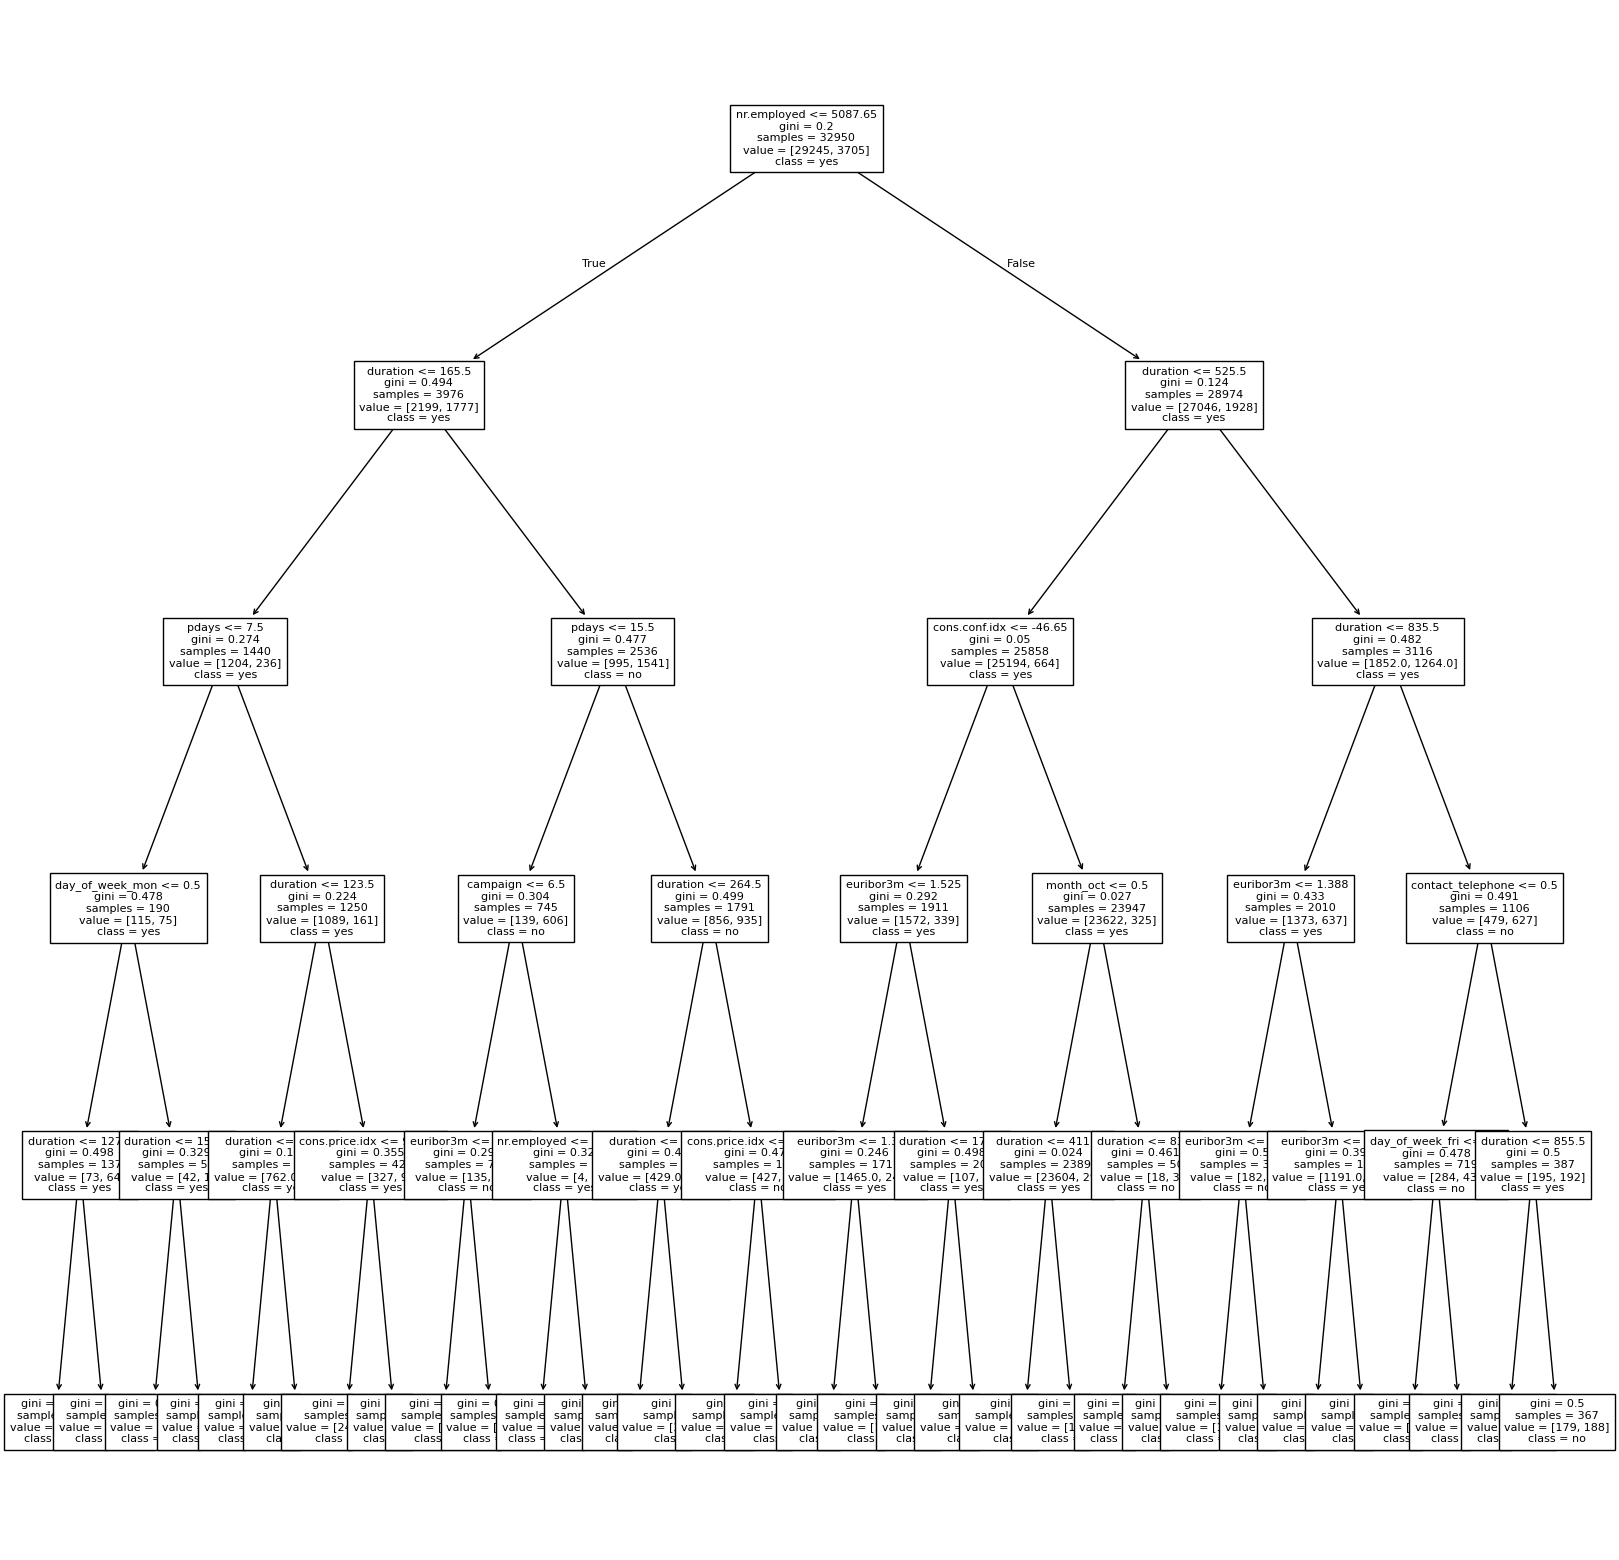

In [26]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(max_depth = 5,random_state=42)
dc.fit(x_train,y_train) #training the model
# visualising the model
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(
    dc,
    feature_names = x.columns,
    class_names = ["yes","no"],
    fontsize = 8,
)
plt.show()

